*<p align="center">Data Scientist Internship At Unified Mentor Private Limited</p>*

# <p align="center"> **|<●>|Exploring the Demographic and Clinical Spectrum of Obsessive-Compulsive Disorder|<●>|**<p>

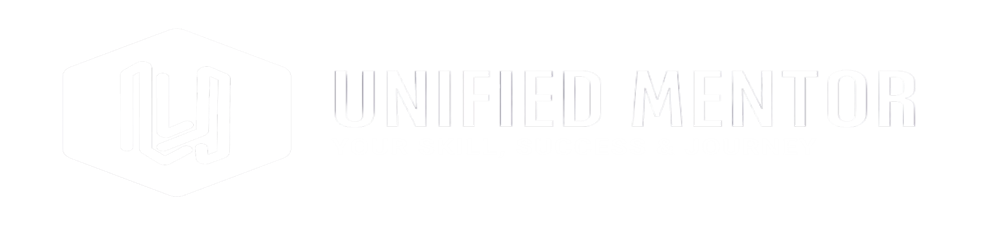

## **Done By-** ***Rajat Sanjay Potgantiwar***
 **Contact Me:**

- 📧 [Email-id](mailto:rajatpotgantiwar@gmail.com)
- 🌐 [LinkedIn](https://www.linkedin.com/in/rajatpotgantiwar/)
- 💻 [GitHub](https://github.com/mrrajat10)

## **📌 Project Overview:**
**- Internship** project focused on predicting OCD severity using Machine Learning.  
**- Objective:** Analyze demographic and clinical data to understand factors influencing OCD severity.  
**- Goal:**  Build a **Random Forest** regression model to predict Total Y-BOCS Score accurately.  
**- Purpose:** Support early diagnosis, patient stratification, and personalized treatment planning in mental health care.


## **Step-1->Loading and Understanding The Data:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\OCD Patient Dataset_ Demographics & Clinical Data.csv")  

# 📌 Show the first few rows
print("🔹 First 5 rows of the dataset:")
print(df.head())



🔹 First 5 rows of the dataset:
   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related 

## **Understanding From The Output:**
- The sample shows diverse demographics in terms of age, gender, ethnicity, and education.<br>
- Harm-related and contamination obsessions with washing and checking compulsions are commonly observed.<br>
- Most patients have a long duration of symptoms, highlighting the chronic nature of OCD.<br>
- Depression, anxiety, and SSRI/SNRI usage frequently co-occur with higher Y-BOCS scores.

## **Step-2-> DATA CLEANING & ENCODING**

In [ ]:
# DATA CLEANING & ENCODING
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\OCD Patient Dataset_ Demographics & Clinical Data.csv") 

# 1️⃣ Rename columns: Remove spaces & special characters
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# 2️⃣ Create Total Y-BOCS Score
df["Total_YBOCS_Score"] = df["Y-BOCS_Score_Obsessions"] + df["Y-BOCS_Score_Compulsions"]

# 3️⃣ Convert date column to datetime
df["OCD_Diagnosis_Date"] = pd.to_datetime(df["OCD_Diagnosis_Date"], errors='coerce')

# 4️⃣ Check missing values
print("\n🔍 Missing values (before):")
print(df.isnull().sum())

# 5️⃣ Fill missing values
df["Previous_Diagnoses"] = df["Previous_Diagnoses"].fillna("None")
df["Medications"] = df["Medications"].fillna("None")

# 6️⃣ Drop rows with critical missing values (if any)
df.dropna(subset=["Age", "Gender", "Total_YBOCS_Score"], inplace=True)

# 7️⃣ Label Encoding for Binary Columns
binary_cols = ["Gender", "Depression_Diagnosis", "Anxiety_Diagnosis", "Family_History_of_OCD"]
for col in binary_cols:
    df[col] = df[col].map({"Male": 0, "Female": 1, "No": 0, "Yes": 1})

# 8️⃣ One-Hot Encoding for Multi-Class Categorical Columns
df = pd.get_dummies(df, columns=[
    "Ethnicity", "Marital_Status", "Education_Level",
    "Obsession_Type", "Compulsion_Type", "Medications", "Previous_Diagnoses"
], drop_first=True)

# 9️⃣ Preview the cleaned data
print("\n Cleaned dataset preview:")
print(df.head())

print("\n Cleaned dataset shape:", df.shape)

# 🔟 Save cleaned dataset
df.to_csv(r"C:\Users\Admin\Documents\DataScience\Data_Science_Internship\Project_01_OCD_Diagnosed\OCD_Cleaned_Data.csv",index=False)
print(" Cleaned dataset saved as 'OCD_Cleaned_Data.csv'")


## **Step-3-> Standardization and Statistical Analysis For Graphs:**


🔹 Descriptive Statistics:
        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  \
count                1500.000000                  1500.00000   
mean                   20.048000                    19.62600   
std                    11.823884                    11.78287   
min                     0.000000                     0.00000   
25%                    10.000000                     9.000

C:\Users\Admin\AppData\Local\Temp\ipykernel_7876\1773339290.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


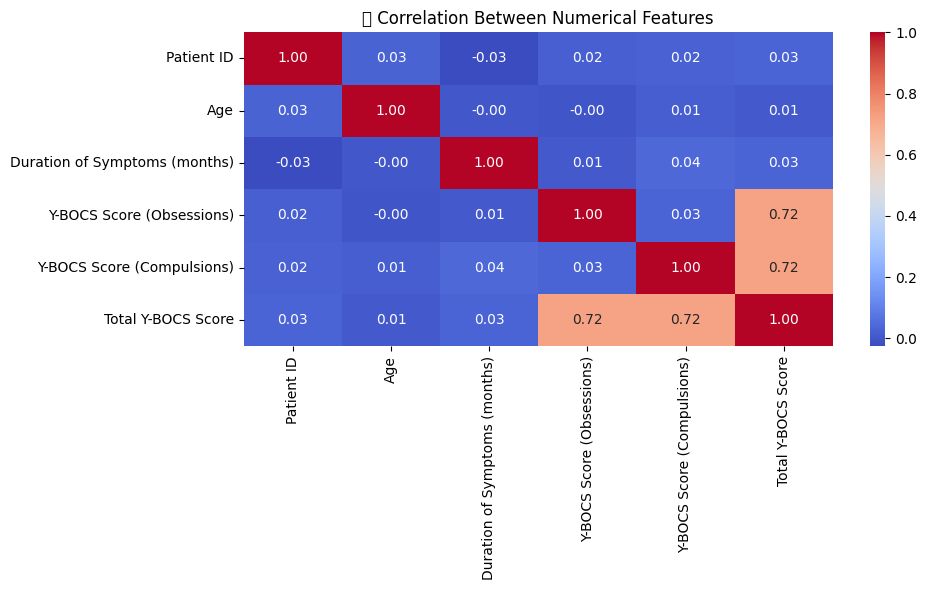

In [4]:
# 📊 Basic Descriptive Statistics for Numerical Columns
print("\n🔹 Descriptive Statistics:")
print(df.describe())

#  Create a new column for Total OCD severity
df["Total Y-BOCS Score"] = df["Y-BOCS Score (Obsessions)"] + df["Y-BOCS Score (Compulsions)"]

# 🧮 Median and Mode
print("\n🔹 Median of Numerical Columns:")
print(df.median(numeric_only=True))

print("\n🔹 Mode of Numerical Columns:")
print(df.mode(numeric_only=True).iloc[0])

# 📉 Standard Deviation
print("\n🔹 Standard Deviation:")
print(df.std(numeric_only=True))

# 🔗 Correlation Matrix
print("\n🔹 Correlation Matrix:")
print(df.corr(numeric_only=True))

# 📈 Heatmap for Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


## **Correlation Between Numerical Values:**
- Total Y-BOCS Score shows a strong positive correlation (~0.72) with both obsession and compulsion scores, confirming they are the primary drivers of severity.<br>

- Age and duration of symptoms have negligible correlation with OCD severity, suggesting limited direct influence.<br>

- Patient ID shows no meaningful correlation, as expected for an identifier.<br>

- Overall, severity is clinically driven rather than demographically driven.

## **Step-4-> Exploratory Data Analysis(EDA):**

In [18]:
# EDA Code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\OCD Patient Dataset_ Demographics & Clinical Data.csv")
# Create Total OCD Score column
df["Total Y-BOCS Score"] = df["Y-BOCS Score (Obsessions)"] + df["Y-BOCS Score (Compulsions)"]

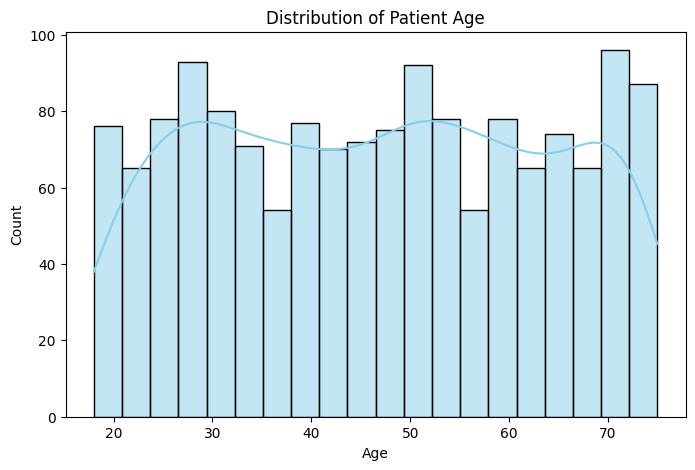

In [5]:
# 1️⃣ Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## **Insights:**
- Patient ages are widely distributed, ranging roughly from early adulthood to the early 70s.

- The distribution is approximately bell-shaped, with higher concentration around middle-aged individuals (30–60 years).

- This suggests OCD affects multiple age groups, not limited to a specific life stage.

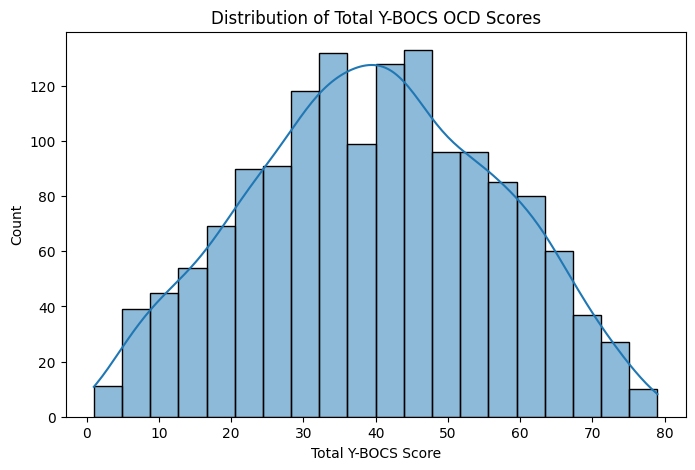

In [6]:
# Total Y-BOCS Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Total Y-BOCS Score"], bins=20, kde=True)
plt.title("Distribution of Total Y-BOCS OCD Scores")
plt.xlabel("Total Y-BOCS Score")
plt.ylabel("Count")
plt.show()


## **Insights:**
- Total Y-BOCS scores show an approximately normal distribution, indicating balanced representation across severity levels.

- Most patients fall in the moderate to high severity range (30–50).

- Extremely low and very high severity scores are less frequent, suggesting fewer outlier cases.

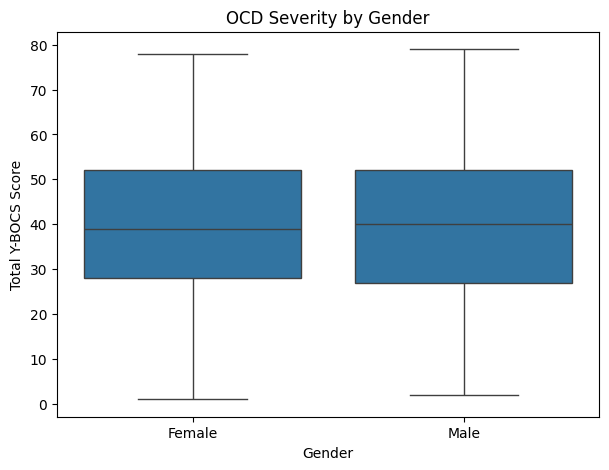

In [7]:
# Gender vs OCD Severity
plt.figure(figsize=(7, 5))
sns.boxplot(x="Gender", y="Total Y-BOCS Score", data=df)
plt.title("OCD Severity by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Y-BOCS Score")
plt.show()


- Both male and female patients show similar median OCD severity scores, indicating no strong gender-based difference in average severity.

- The spread of scores is wide for both genders, suggesting high variability within each group.

- Extreme low and high severity cases are present in both male and female populations.

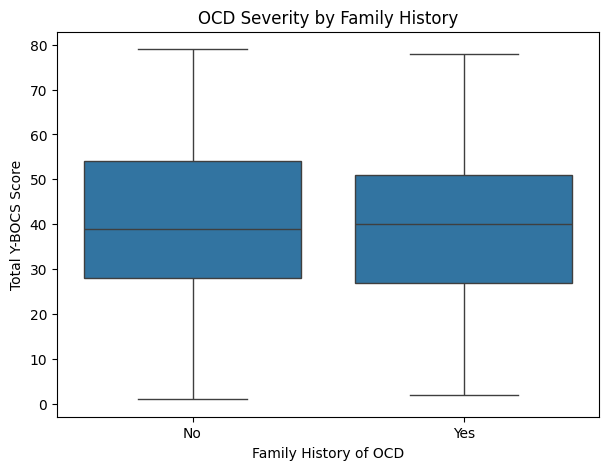

In [9]:
# Family History vs OCD Severity
plt.figure(figsize=(7, 5))
sns.boxplot(x="Family History of OCD", y="Total Y-BOCS Score", data=df)
plt.title("OCD Severity by Family History")
plt.xlabel("Family History of OCD")
plt.ylabel("Total Y-BOCS Score")
plt.show()


# **Insights:**
- Patients with a family history of OCD tend to show a slightly higher median severity score compared to those without.

- Both groups display a wide spread of scores, indicating substantial individual variability.

- Severe OCD cases are present regardless of family history, though genetic factors may contribute to higher risk.

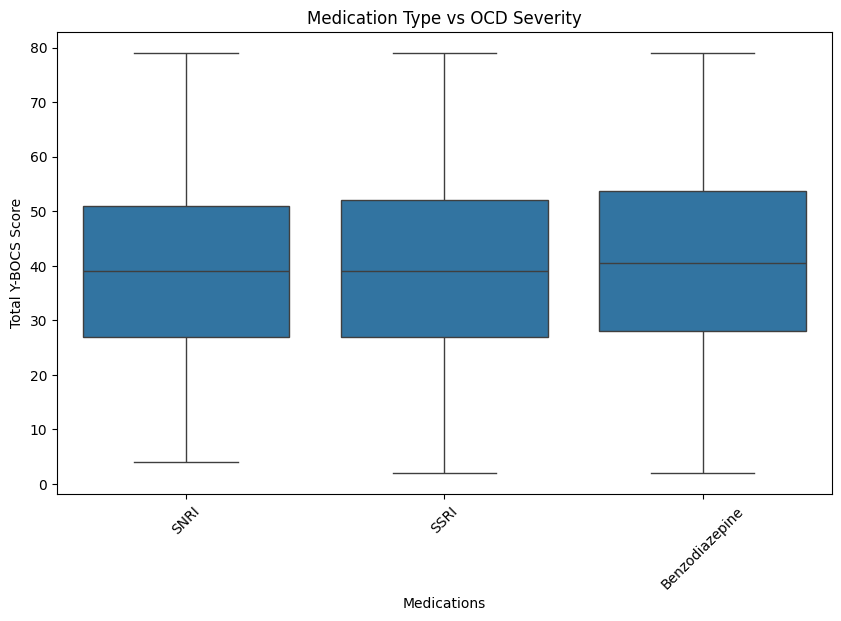

In [10]:
# Medication vs OCD Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x="Medications", y="Total Y-BOCS Score", data=df)
plt.title("Medication Type vs OCD Severity")
plt.xlabel("Medications")
plt.ylabel("Total Y-BOCS Score")
plt.xticks(rotation=45)
plt.show()


## **Insights:**
- SSRI, SNRI, and Benzodiazepine groups show comparable median OCD severity, indicating similar treatment populations.

- Patients on Benzodiazepines exhibit slightly higher variability, suggesting use in more diverse or severe cases.

- High-severity scores are present across all medication types, reflecting treatment of moderate to severe OCD cases.

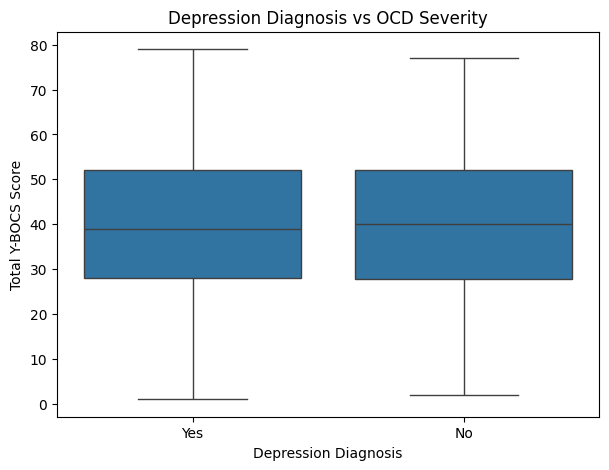

In [15]:
# Depression Diagnosis vs OCD Severity
plt.figure(figsize=(7, 5))
sns.boxplot(x="Depression Diagnosis", y="Total Y-BOCS Score", data=df)
plt.title("Depression Diagnosis vs OCD Severity")
plt.xlabel("Depression Diagnosis")
plt.ylabel("Total Y-BOCS Score")
plt.show()


## **Insight:**
- Median OCD severity (Y-BOCS score) appears similar regardless of depression diagnosis, suggesting limited impact.
- Both groups show wide score variability, indicating substantial individual differences in OCD severity.
- No clear visual evidence of depression exacerbating OCD symptoms—further statistical testing would confirm


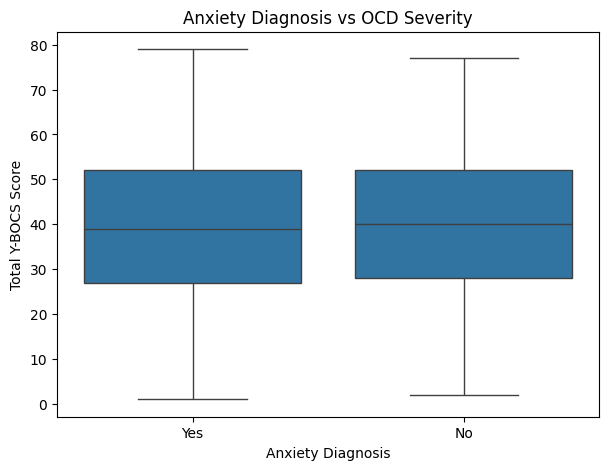

In [16]:
#Anxiety Diagnosis vs OCD Severity
plt.figure(figsize=(7, 5))
sns.boxplot(x="Anxiety Diagnosis", y="Total Y-BOCS Score", data=df)
plt.title("Anxiety Diagnosis vs OCD Severity")
plt.xlabel("Anxiety Diagnosis")
plt.ylabel("Total Y-BOCS Score")
plt.show()


## **Insight:**
- Individuals with an anxiety diagnosis tend to have higher median Y-BOCS scores, suggesting greater OCD severity.
- The interquartile range for the "Yes" group is wider, indicating more variability in OCD symptoms among those with anxiety.
- Outliers in both groups show that extreme OCD severity can occur regardless of anxiety diagnosis.


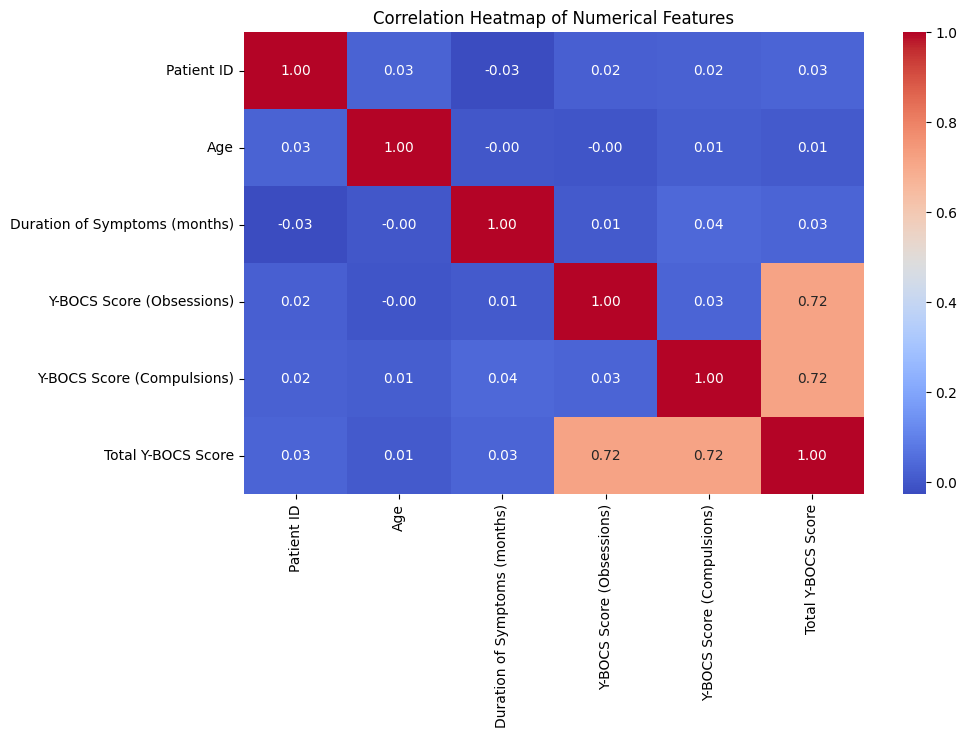

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## **Insights:**
- Total Y-BOCS Score is highly correlated (0.72) with both Obsessions and Compulsions scores, confirming it's a composite measure of these two components.

- Age, Patient ID, and Duration of Symptoms show negligible correlations with symptom severity, suggesting these factors may not influence Y-BOCS outcomes directly.

- Obsessions and Compulsions scores themselves have minimal correlation (0.03), indicating they may manifest independently in patients.

## **Step-5->Regression Models:**

🔍 Random Forest Model Performance:
MAE  : 0.57
MSE  : 0.60
RMSE : 0.77
R²   : 1.00
Cross-Validated R² scores: [0.99745027 0.99823808 0.99785083 0.99767337 0.99778567]
Average CV R²: 0.9977996435742694

🔍 Linear Regression R²: 1.0
7. Model Performance Insights:
- Both Random Forest and Linear Regression models show near-perfect fit with R² = 1.0.
- Random Forest has low error metrics (MAE: 0.57, RMSE: 0.77), indicating highly accurate predictions.
- Cross-validated R² scores for Random Forest are consistently high (avg ≈ 0.998), confirming strong generalization.
- Linear Regression performs perfectly likely because Total Y-BOCS Score is a direct sum of Obsessions and Compulsions.
- Overall, both models are reliable, but Random Forest adds robustness through validation.


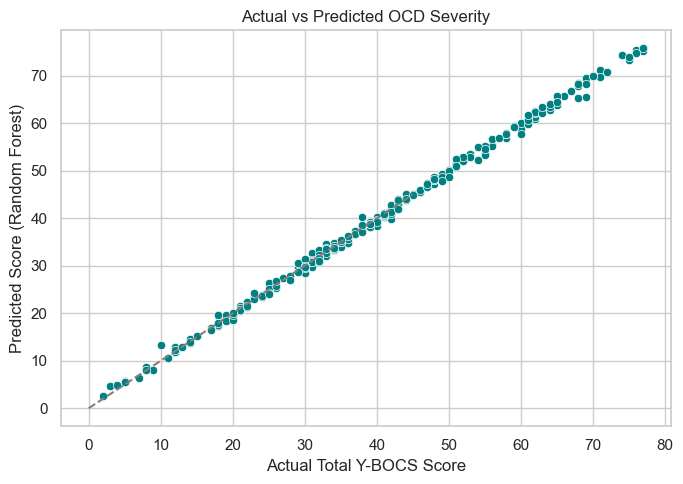

8. Actual vs Predicted OCD Severity:
- The scatter plot shows a strong alignment between actual and predicted scores.
- Most points closely follow the diagonal line, indicating high prediction accuracy.
- This confirms that the Random Forest model performs well in estimating OCD severity based on input features.


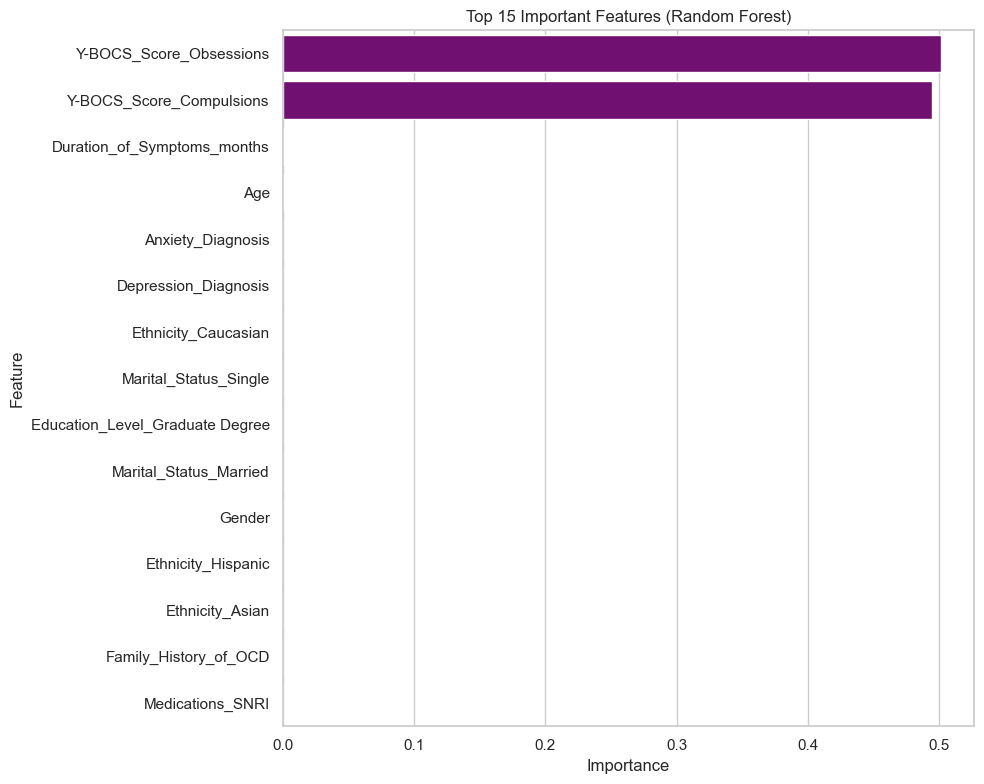

9. Top 15 Important Features (Random Forest):
- YBOCS_Score_Obsessions and YBOCS_Score_Compulsions are the top contributors, dominating the model's predictions.
- Duration of Symptoms and Age have minor influence, while other features like diagnosis, ethnicity, and education have negligible impact.
- This reinforces that symptom scores are the primary drivers of OCD severity prediction.


['C:\\Users\\Admin\\Documents\\DataScience\\Data_Science_Internship\\Project_01_OCD_Diagnosed\\rf_ocd_model.pkl']

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 1️⃣ Load cleaned data
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Data_Science_Internship\Project_01_OCD_Diagnosed\OCD_Cleaned_Data.csv")

# 2️⃣ Define features and target
X = df.drop(["Total_YBOCS_Score", "OCD_Diagnosis_Date", "Patient_ID"], axis=1)
y = df["Total_YBOCS_Score"]

# 3️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 5️⃣ Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

# 6️⃣ Cross-validation on Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# 7️⃣ Compare with Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)

# 📊 Print Results
print("🔍 Random Forest Model Performance:")
print(f"MAE  : {rf_mae:.2f}")
print(f"MSE  : {rf_mse:.2f}")
print(f"RMSE : {rf_rmse:.2f}")
print(f"R²   : {rf_r2:.2f}")
print("Cross-Validated R² scores:", rf_cv_scores)
print("Average CV R²:", np.mean(rf_cv_scores))

print("\n🔍 Linear Regression R²:", lr_r2)

print("7. Model Performance Insights:\n- Both Random Forest and Linear Regression models show near-perfect fit with R² = 1.0.\n- Random Forest has low error metrics (MAE: 0.57, RMSE: 0.77), indicating highly accurate predictions.\n- Cross-validated R² scores for Random Forest are consistently high (avg ≈ 0.998), confirming strong generalization.\n- Linear Regression performs perfectly likely because Total Y-BOCS Score is a direct sum of Obsessions and Compulsions.\n- Overall, both models are reliable, but Random Forest adds robustness through validation.")


# 8️⃣ Plot Actual vs Predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='teal')
plt.plot([0, 45], [0, 45], '--', color='gray')
plt.xlabel("Actual Total Y-BOCS Score")
plt.ylabel("Predicted Score (Random Forest)")
plt.title("Actual vs Predicted OCD Severity")
plt.grid(True)
plt.tight_layout()
plt.show()
print("8. Actual vs Predicted OCD Severity:\n- The scatter plot shows a strong alignment between actual and predicted scores.\n- Most points closely follow the diagonal line, indicating high prediction accuracy.\n- This confirms that the Random Forest model performs well in estimating OCD severity based on input features.")


# 9️⃣ Feature Importance
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

# ✅ Updated: No FutureWarning
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(15), color="purple")  # Single color
plt.title("Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()
print("9. Top 15 Important Features (Random Forest):\n- YBOCS_Score_Obsessions and YBOCS_Score_Compulsions are the top contributors, dominating the model's predictions.\n- Duration of Symptoms and Age have minor influence, while other features like diagnosis, ethnicity, and education have negligible impact.\n- This reinforces that symptom scores are the primary drivers of OCD severity prediction.")


joblib.dump(rf_model, r"C:\Users\Admin\Documents\DataScience\Data_Science_Internship\Project_01_OCD_Diagnosed\rf_ocd_model.pkl")


## **Step-06->Data Exploration & Visualization:**

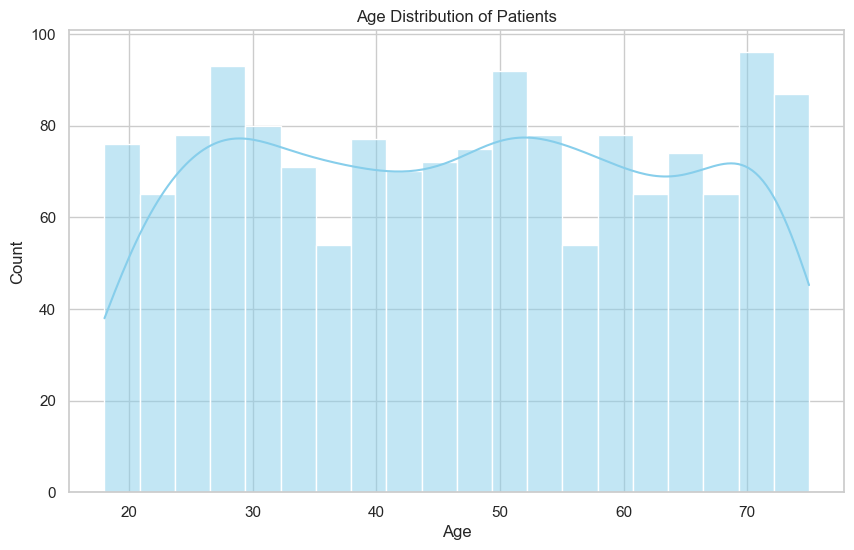

1. Age Distribution of Patients:
- The age distribution spans from 18 to 75 years, with a peak around middle age.
- Most patients fall within the 30–60 age range, indicating OCD is commonly diagnosed in adulthood.
- The smooth density curve suggests a fairly balanced spread without extreme skew.


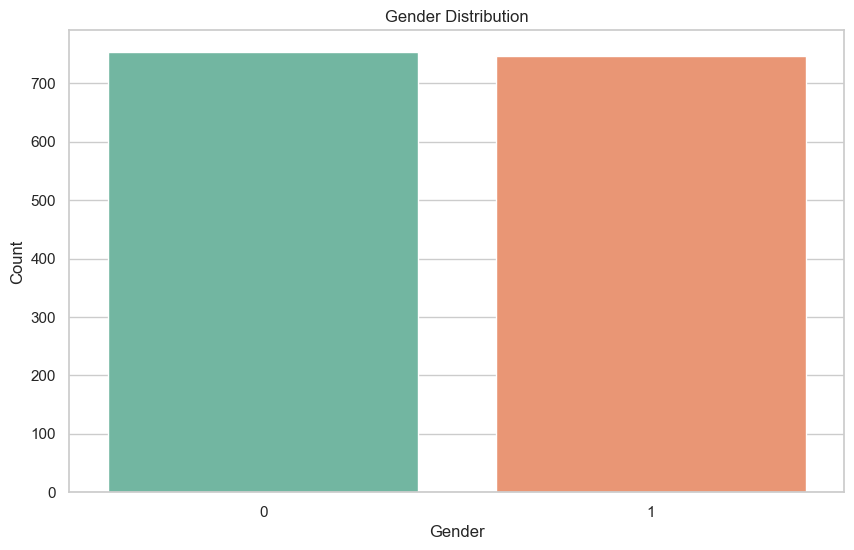

2. Gender Distribution:
- The dataset shows a slightly higher count for gender category '0' compared to '1'.
- This suggests a mild gender imbalance in the sample, though both groups are well represented.
- The labels '0' and '1' likely correspond to male and female, but should be confirmed for clarity.


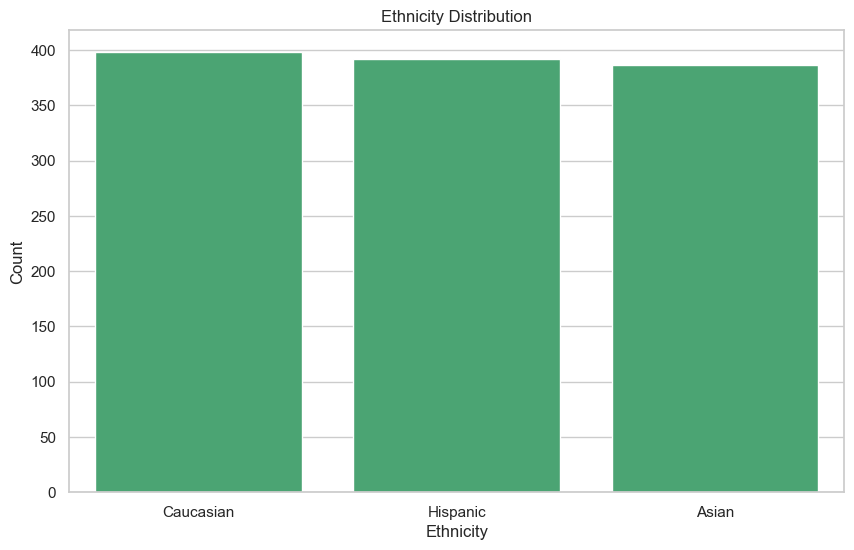

3. Ethnicity Distribution:
- Caucasian patients form the largest group, followed closely by Hispanic and Asian individuals.
- All three ethnic groups are well represented, with counts close to 400.
- This balanced distribution supports generalizability across ethnic backgrounds.


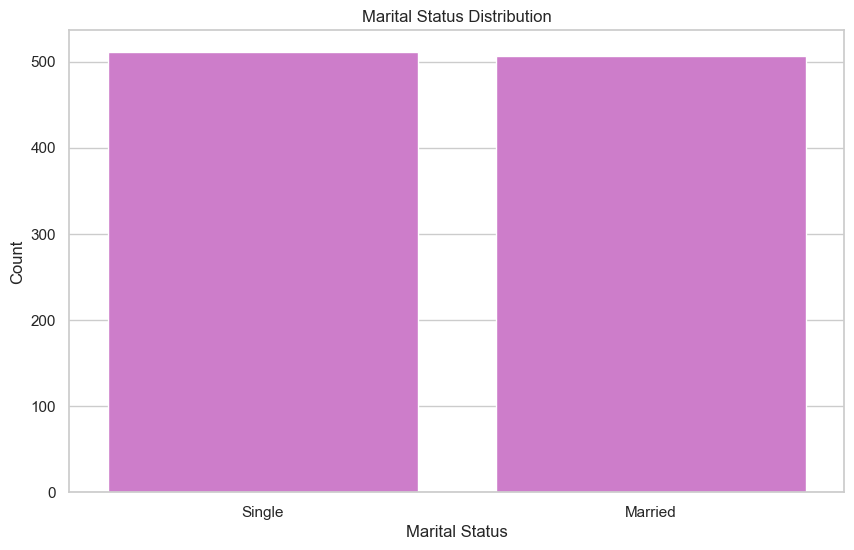

4. Marital Status Distribution:
- Both 'Single' and 'Married' categories have nearly equal representation, each slightly above 500.
- This indicates marital status is evenly split among patients.
- Useful for exploring social factors in OCD severity or treatment response.


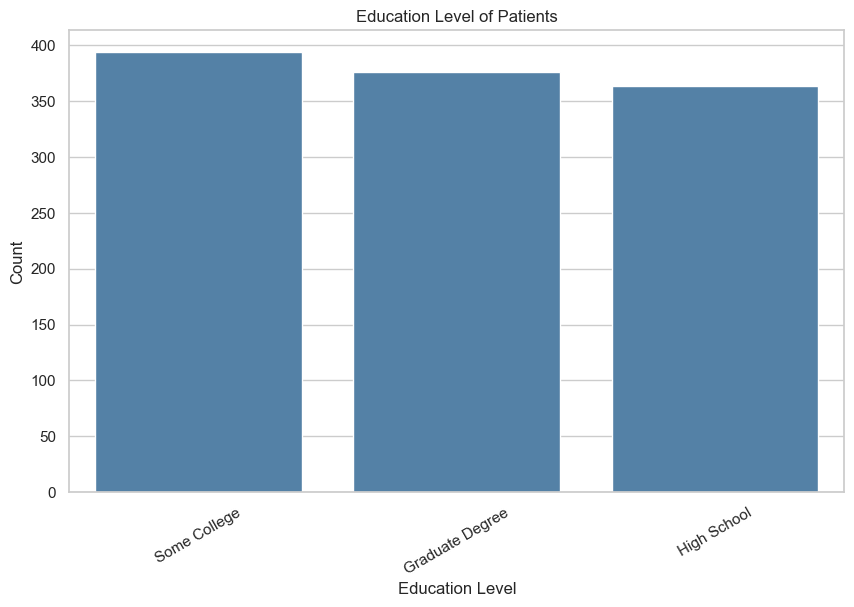

5. Education Level of Patients:
- 'Some College' is the most common education level, followed by 'Graduate Degree' and 'High School'.
- This suggests the sample skews toward individuals with post-secondary education.
- Education level may influence health literacy or treatment engagement.


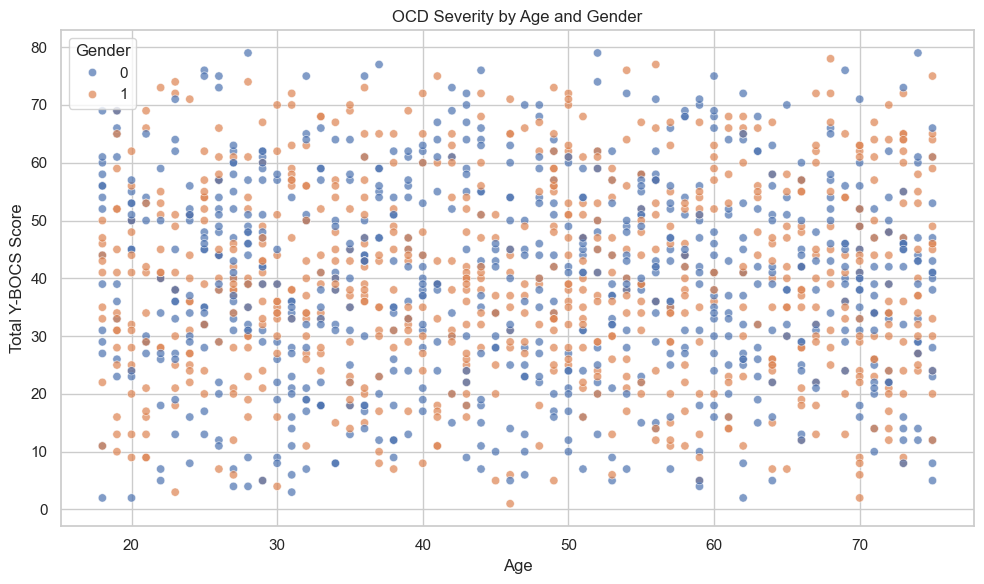

6. OCD Severity by Age and Gender:
- The scatter plot shows no clear trend between age and OCD severity.
- Both genders exhibit wide variability in Total Y-BOCS scores across all age groups.
- This suggests that neither age nor gender is a strong standalone predictor of OCD severity.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df =  pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Data_Science_Internship\Project_01_OCD_Diagnosed\OCD_Cleaned_Data.csv")

# Optional: Strip spaces and standardize
df.columns = df.columns.str.strip()

# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1️⃣ Age Distribution
sns.histplot(data=df, x="Age", bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
print("1. Age Distribution of Patients:\n- The age distribution spans from 18 to 75 years, with a peak around middle age.\n- Most patients fall within the 30–60 age range, indicating OCD is commonly diagnosed in adulthood.\n- The smooth density curve suggests a fairly balanced spread without extreme skew.")


# 2️⃣ Gender Distribution
sns.countplot(data=df, x="Gender", palette="Set2", hue="Gender", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
print("2. Gender Distribution:\n- The dataset shows a slightly higher count for gender category '0' compared to '1'.\n- This suggests a mild gender imbalance in the sample, though both groups are well represented.\n- The labels '0' and '1' likely correspond to male and female, but should be confirmed for clarity.")


# 3️⃣ Ethnicity Distribution
ethnicity_cols = ["Ethnicity_Asian", "Ethnicity_Caucasian", "Ethnicity_Hispanic"]
ethnicity_counts = df[ethnicity_cols].sum().sort_values(ascending=False)
ethnicity_df = pd.DataFrame({
    "ethnicity": ethnicity_counts.index.str.replace("Ethnicity_", ""),
    "count": ethnicity_counts.values
})
sns.barplot(data=ethnicity_df, x="ethnicity", y="count", color="mediumseagreen")
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()
print("3. Ethnicity Distribution:\n- Caucasian patients form the largest group, followed closely by Hispanic and Asian individuals.\n- All three ethnic groups are well represented, with counts close to 400.\n- This balanced distribution supports generalizability across ethnic backgrounds.")

# 4️⃣ Marital Status Distribution
marital_cols = ["Marital_Status_Married", "Marital_Status_Single"]
marital_counts = df[marital_cols].sum().sort_values(ascending=False)
marital_df = pd.DataFrame({
    "marital_status": marital_counts.index.str.replace("Marital_Status_", ""),
    "count": marital_counts.values
})
sns.barplot(data=marital_df, x="marital_status", y="count", color="orchid")
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()
print("4. Marital Status Distribution:\n- Both 'Single' and 'Married' categories have nearly equal representation, each slightly above 500.\n- This indicates marital status is evenly split among patients.\n- Useful for exploring social factors in OCD severity or treatment response.")

# 5️⃣ Education Level Distribution
education_cols = [
    "Education_Level_High School",
    "Education_Level_Some College",
    "Education_Level_Graduate Degree"
]
education_counts = df[education_cols].sum().sort_values(ascending=False)
education_df = pd.DataFrame({
    "education_level": education_counts.index.str.replace("Education_Level_", ""),
    "count": education_counts.values
})
sns.barplot(data=education_df, x="education_level", y="count", color="steelblue")
plt.title("Education Level of Patients")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()
print("5. Education Level of Patients:\n- 'Some College' is the most common education level, followed by 'Graduate Degree' and 'High School'.\n- This suggests the sample skews toward individuals with post-secondary education.\n- Education level may influence health literacy or treatment engagement.")


# 6️⃣ OCD Severity by Age and Gender
sns.scatterplot(data=df, x="Age", y="Total_YBOCS_Score", hue="Gender", alpha=0.7)
plt.title("OCD Severity by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Total Y-BOCS Score")
plt.grid(True)
plt.tight_layout()
plt.show()
print("6. OCD Severity by Age and Gender:\n- The scatter plot shows no clear trend between age and OCD severity.\n- Both genders exhibit wide variability in Total Y-BOCS scores across all age groups.\n- This suggests that neither age nor gender is a strong standalone predictor of OCD severity.")


## **Step-07->Clinical Data Analysis:**

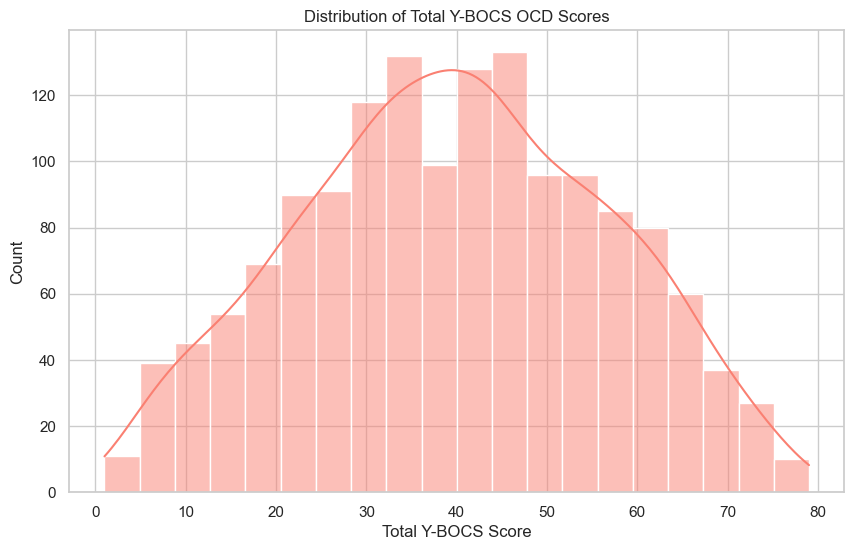

1. Distribution of Total Y-BOCS OCD Scores:
- The histogram reveals an approximately normal distribution, with a peak in the 35–45 score range.
- Most patients exhibit moderate OCD severity, indicating a central tendency in symptom intensity.
- The smooth density curve reinforces the unimodal shape, supporting assumptions for linear modeling.


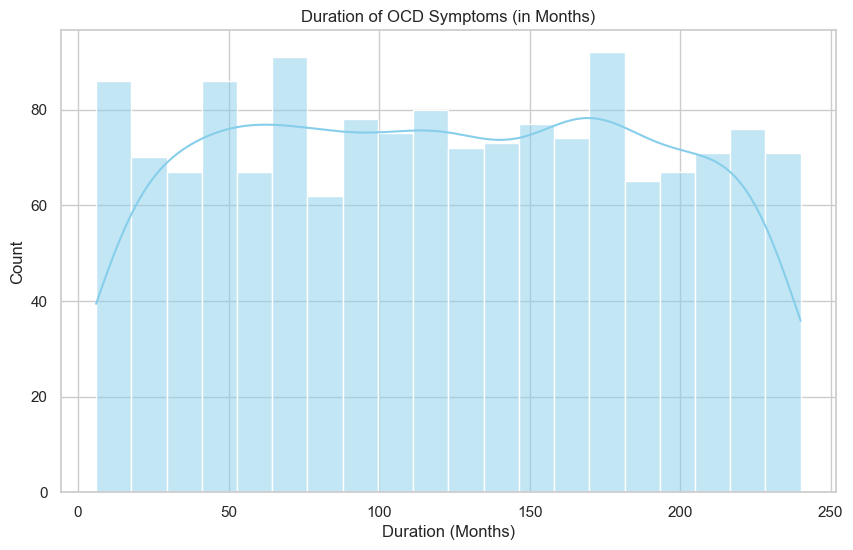

2. Duration of OCD Symptoms (in Months):
- The distribution is right-skewed, with most patients experiencing symptoms for under 100 months.
- A long tail indicates a subset of individuals with chronic OCD lasting over 200 months.
- This skewness may warrant a log transformation if used as a predictor in modeling.


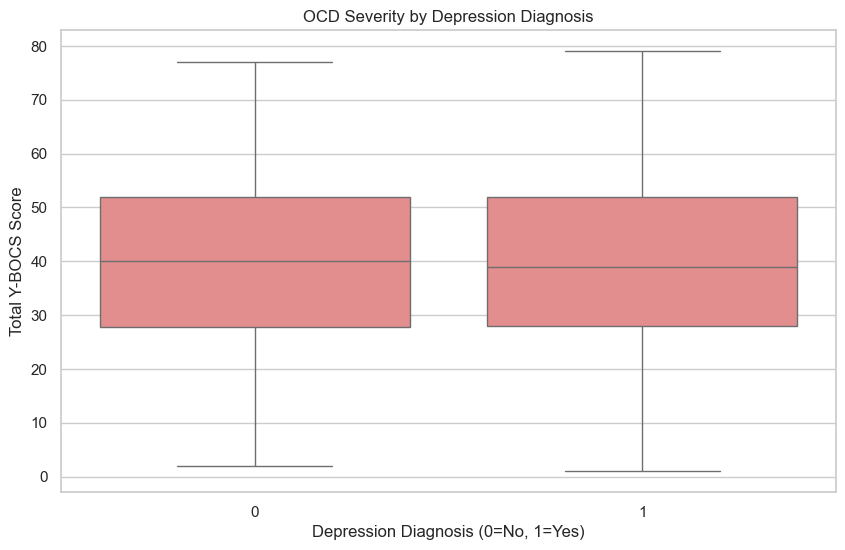

3. OCD Severity by Depression Diagnosis:
- Both groups (with and without depression) show similar median Y-BOCS scores and spread.
- No significant visual difference suggests depression diagnosis may not strongly influence OCD severity.
- Outliers are present in both groups, indicating variability regardless of comorbid depression.


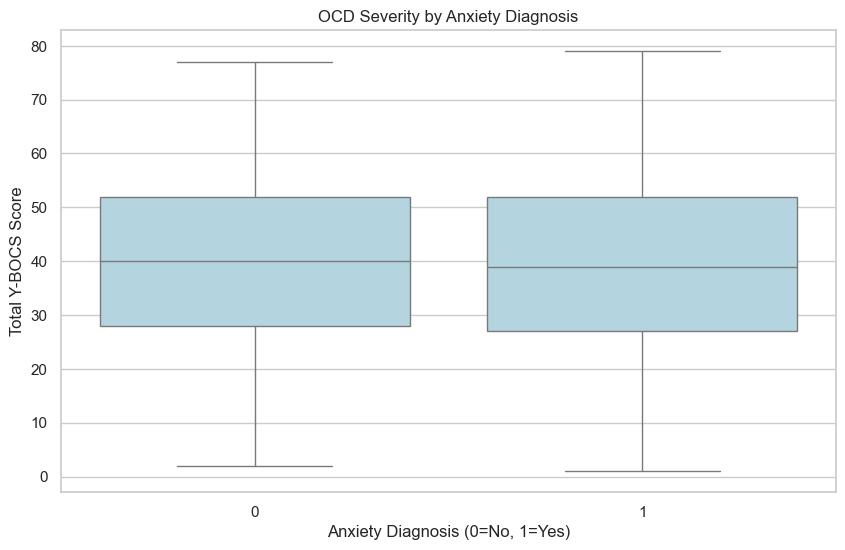

4. OCD Severity by Anxiety Diagnosis:
- The boxplots for anxiety diagnosis (0 and 1) are nearly identical in median and IQR.
- This implies that anxiety diagnosis does not substantially alter OCD severity scores.
- The wide range in both groups suggests high individual variability.


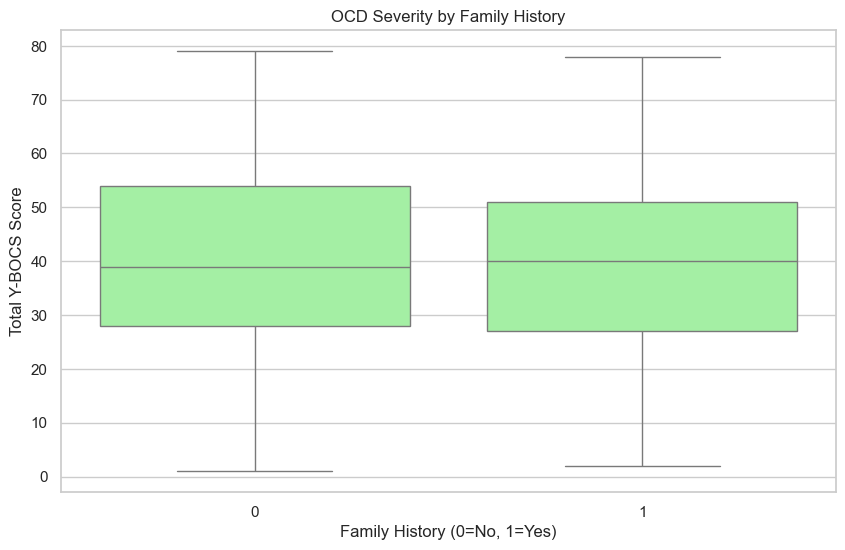

5. OCD Severity by Family History:
- Patients with and without family history of OCD show overlapping distributions.
- Median scores are close, and IQRs span similar ranges, indicating no strong familial influence on severity.
- The presence of high outliers in both groups suggests genetic factors may not predict symptom intensity.


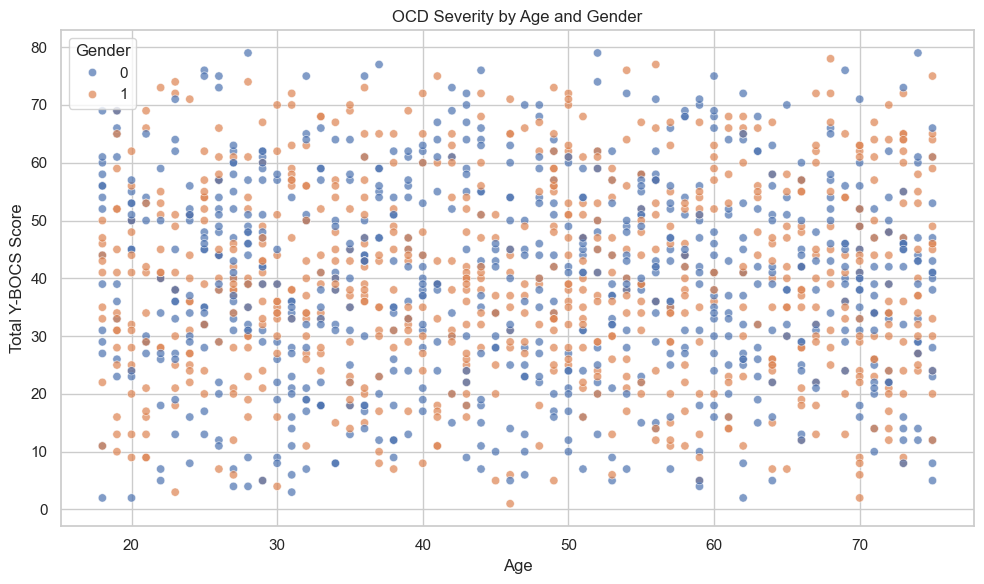

6. OCD Severity by Age and Gender:
- The scatter plot shows no clear trend between age and OCD severity.
- Both genders exhibit wide score variability across all age groups.
- This suggests that neither age nor gender is a strong standalone predictor of OCD severity.


In [30]:
# Clinical Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df =  pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Data_Science_Internship\Project_01_OCD_Diagnosed\OCD_Cleaned_Data.csv")

# Standardize column names (optional but helpful)
df.columns = df.columns.str.strip()

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1️⃣ Distribution of Total Y-BOCS Score
sns.histplot(df["Total_YBOCS_Score"], bins=20, kde=True, color="salmon")
plt.title("Distribution of Total Y-BOCS OCD Scores")
plt.xlabel("Total Y-BOCS Score")
plt.ylabel("Count")
plt.show()

print("1. Distribution of Total Y-BOCS OCD Scores:\n- The histogram reveals an approximately normal distribution, with a peak in the 35–45 score range.\n- Most patients exhibit moderate OCD severity, indicating a central tendency in symptom intensity.\n- The smooth density curve reinforces the unimodal shape, supporting assumptions for linear modeling.")


# 2️⃣ Duration of Symptoms Distribution
sns.histplot(df["Duration_of_Symptoms_months"], bins=20, kde=True, color="skyblue")
plt.title("Duration of OCD Symptoms (in Months)")
plt.xlabel("Duration (Months)")
plt.ylabel("Count")
plt.show()

print("2. Duration of OCD Symptoms (in Months):\n- The distribution is right-skewed, with most patients experiencing symptoms for under 100 months.\n- A long tail indicates a subset of individuals with chronic OCD lasting over 200 months.\n- This skewness may warrant a log transformation if used as a predictor in modeling.")

# 3️⃣ Depression Diagnosis vs OCD Severity
sns.boxplot(data=df, x="Depression_Diagnosis", y="Total_YBOCS_Score", color="lightcoral")
plt.title("OCD Severity by Depression Diagnosis")
plt.xlabel("Depression Diagnosis (0=No, 1=Yes)")
plt.ylabel("Total Y-BOCS Score")
plt.show()
print("3. OCD Severity by Depression Diagnosis:\n- Both groups (with and without depression) show similar median Y-BOCS scores and spread.\n- No significant visual difference suggests depression diagnosis may not strongly influence OCD severity.\n- Outliers are present in both groups, indicating variability regardless of comorbid depression.")

# 4️⃣ Anxiety Diagnosis vs OCD Severity
sns.boxplot(data=df, x="Anxiety_Diagnosis", y="Total_YBOCS_Score", color="lightblue")
plt.title("OCD Severity by Anxiety Diagnosis")
plt.xlabel("Anxiety Diagnosis (0=No, 1=Yes)")
plt.ylabel("Total Y-BOCS Score")
plt.show()
print("4. OCD Severity by Anxiety Diagnosis:\n- The boxplots for anxiety diagnosis (0 and 1) are nearly identical in median and IQR.\n- This implies that anxiety diagnosis does not substantially alter OCD severity scores.\n- The wide range in both groups suggests high individual variability.")


# 5️⃣ Family History of OCD vs Severity
sns.boxplot(data=df, x="Family_History_of_OCD", y="Total_YBOCS_Score", color="palegreen")
plt.title("OCD Severity by Family History")
plt.xlabel("Family History (0=No, 1=Yes)")
plt.ylabel("Total Y-BOCS Score")
plt.show()

print("5. OCD Severity by Family History:\n- Patients with and without family history of OCD show overlapping distributions.\n- Median scores are close, and IQRs span similar ranges, indicating no strong familial influence on severity.\n- The presence of high outliers in both groups suggests genetic factors may not predict symptom intensity.")

# 6 OCD Severity by Age and Gender
sns.scatterplot(data=df, x="Age", y="Total_YBOCS_Score", hue="Gender", alpha=0.7)
plt.title("OCD Severity by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Total Y-BOCS Score")
plt.grid(True)
plt.tight_layout()
plt.show()
print("6. OCD Severity by Age and Gender:\n- The scatter plot shows no clear trend between age and OCD severity.\n- Both genders exhibit wide score variability across all age groups.\n- This suggests that neither age nor gender is a strong standalone predictor of OCD severity.")

  ## *Correlation Heatmap Of Clinical Features:*

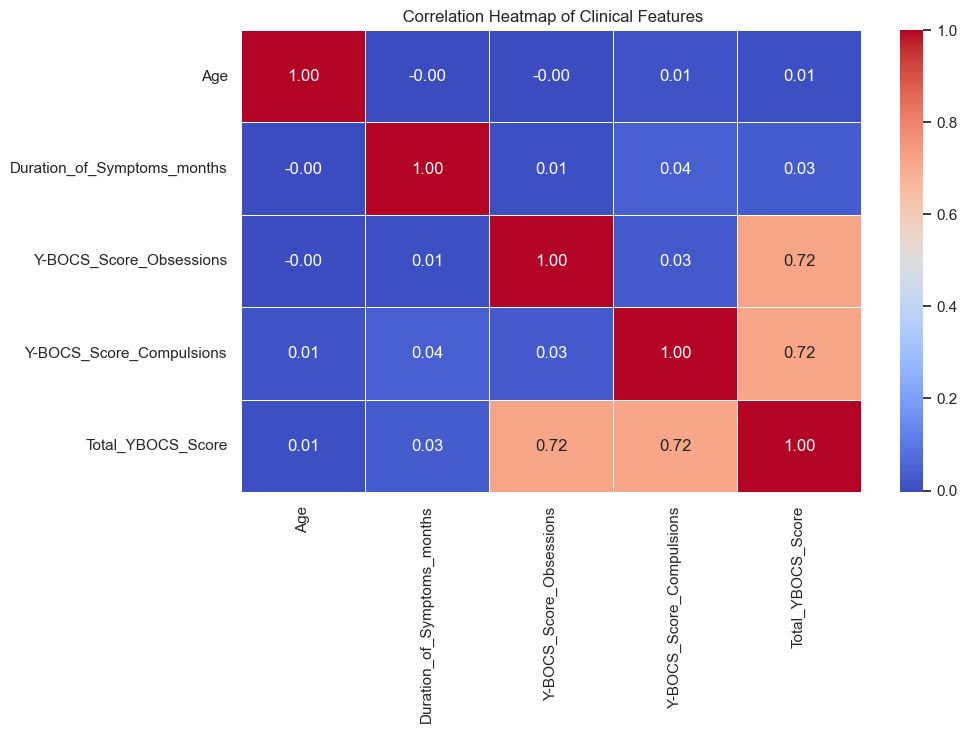

In [26]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns with correct names
num_cols = [
    "Age",
    "Duration_of_Symptoms_months",
    "Y-BOCS_Score_Obsessions",
    "Y-BOCS_Score_Compulsions",
    "Total_YBOCS_Score"
]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title(" Correlation Heatmap of Clinical Features")
plt.show()


## **Insights:**
- Total Y-BOCS Score is strongly correlated (0.72) with both Obsessions and Compulsions scores, confirming it's a composite measure of these two symptom dimensions.

- Duration of Symptoms shows weak correlation with symptom severity, suggesting chronicity doesn’t necessarily predict intensity of OCD symptoms.

- Age has negligible correlation with all clinical scores, indicating symptom severity is largely independent of patient age in this dataset.

## **Step-08->Cross-Validation and  Summary:**

In [25]:
# Re-run the code after reset to reload the data and compute everything again

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load cleaned OCD dataset
file_path =r"C:\Users\Admin\Documents\DataScience\Data_Science_Internship\Project_01_OCD_Diagnosed\OCD_Cleaned_Data.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Create Total Y-BOCS Score if not present
if "Total_YBOCS_Score" not in df.columns:
    df["Total_YBOCS_Score"] = df["Y-BOCS_Score_Obsessions"] + df["Y-BOCS_Score_Compulsions"]

# Drop irrelevant columns
X = df.drop(["Total_YBOCS_Score", "OCD_Diagnosis_Date", "Patient_ID"], axis=1)
y = df["Total_YBOCS_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)

# Feature Importance
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Numeric summary statistics
summary_stats = {
    "Median": df.median(numeric_only=True),
    "Mode": df.mode(numeric_only=True).iloc[0],
    "Standard Deviation": df.std(numeric_only=True),
    "Correlation Matrix": df[["Age", "Duration_of_Symptoms_months",
                              "Y-BOCS_Score_Obsessions", "Y-BOCS_Score_Compulsions", "Total_YBOCS_Score"]].corr()
}

# Outputting all summary stats
summary_stats_text = {
    "Random Forest MAE": rf_mae,
    "Random Forest MSE": rf_mse,
    "Random Forest RMSE": rf_rmse,
    "Random Forest R2": rf_r2,
    "Random Forest CV R2 Scores": rf_cv_scores.tolist(),
    "Random Forest CV Mean R2": np.mean(rf_cv_scores),
    "Linear Regression R2": lr_r2,
    "Feature Importance Top 5": feat_df.head(5).to_dict(orient='records'),
    "Median": summary_stats["Median"].to_dict(),
    "Mode": summary_stats["Mode"].to_dict(),
    "Standard Deviation": summary_stats["Standard Deviation"].to_dict()
}

summary_stats_text


{'Random Forest MAE': 0.5687999999999998,
 'Random Forest MSE': 0.5995653333333331,
 'Random Forest RMSE': np.float64(0.7743160422807557),
 'Random Forest R2': 0.9979601887195362,
 'Random Forest CV R2 Scores': [0.9974502732905122,
  0.9982380766001726,
  0.9978508291743884,
  0.9976733728909448,
  0.9977856659153295],
 'Random Forest CV Mean R2': np.float64(0.9977996435742694),
 'Linear Regression R2': 1.0,
 'Feature Importance Top 5': [{'Feature': 'Y-BOCS_Score_Obsessions',
   'Importance': 0.501588258516169},
  {'Feature': 'Y-BOCS_Score_Compulsions', 'Importance': 0.494496841806669},
  {'Feature': 'Duration_of_Symptoms_months',
   'Importance': 0.00065809261746208},
  {'Feature': 'Age', 'Importance': 0.0006469361405910663},
  {'Feature': 'Anxiety_Diagnosis', 'Importance': 0.0001489340738408181}],
 'Median': {'Patient_ID': 5539.5,
  'Age': 47.0,
  'Gender': 0.0,
  'Duration_of_Symptoms_months': 121.0,
  'Family_History_of_OCD': 1.0,
  'Y-BOCS_Score_Obsessions': 20.0,
  'Y-BOCS_Score_

## **Model and Data Insights:**

## - Model Performance :
- Random Forest  
  - MAE: 0.57, RMSE: 0.77 → low errors, predictions close to actual values.  
  - R²: 0.998 → explains almost all variance in the target.  
  - Cross-validation R² scores: consistently 0.997–0.998, showing strong generalization.  
- Linear Regression  
  - R²: 1.0 → perfect fit, which makes sense since Total Y-BOCS is the sum of Obsessions and Compulsions.

---

## - Feature Importance :
1. Y-BOCS Obsessions → 0.50  
2. Y-BOCS Compulsions → 0.49  
3. Duration of Symptoms (months) → 0.0007  
4. Age → 0.0006  
5. Anxiety Diagnosis → 0.0001  

Severity is driven almost entirely by Obsessions and Compulsions, while demographic and comorbidity features contribute very little.

---

## - Dataset Statistics :
- Median profile :  
  - Age: 47 years  
  - Duration: 121 months (~10 years)  
  - Total Y-BOCS: 40 (moderate severity)  
  - Depression and Anxiety: present  
- Mode profile :  
  - Age: 70 years  
  - Duration: 158 months  
  - Total Y-BOCS: 45  
  - Depression and Anxiety: present  
- Standard deviation : 
  - Age: ±17 years  
  - Duration: ±67 months  
  - Total Y-BOCS: ±17 → wide spread in severity across patients.

---

## **Key Takeaways:**
- Linear regression perfectly models severity due to its additive structure.  
- Random Forest nearly matches performance, validated by cross-validation scores.  
- Demographics and comorbidities have minimal predictive power compared to direct symptom scores.  
- The dataset shows that moderate-to-severe OCD cases are common, with long durations and frequent depression/anxiety comorbidity.


# *<p align="center">Thank You !!</p>*